<a href="https://colab.research.google.com/github/pedrocz82/Data-Science-learning-projects/blob/main/Clustering_applications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Clustering applications**

**Market Segmentation**

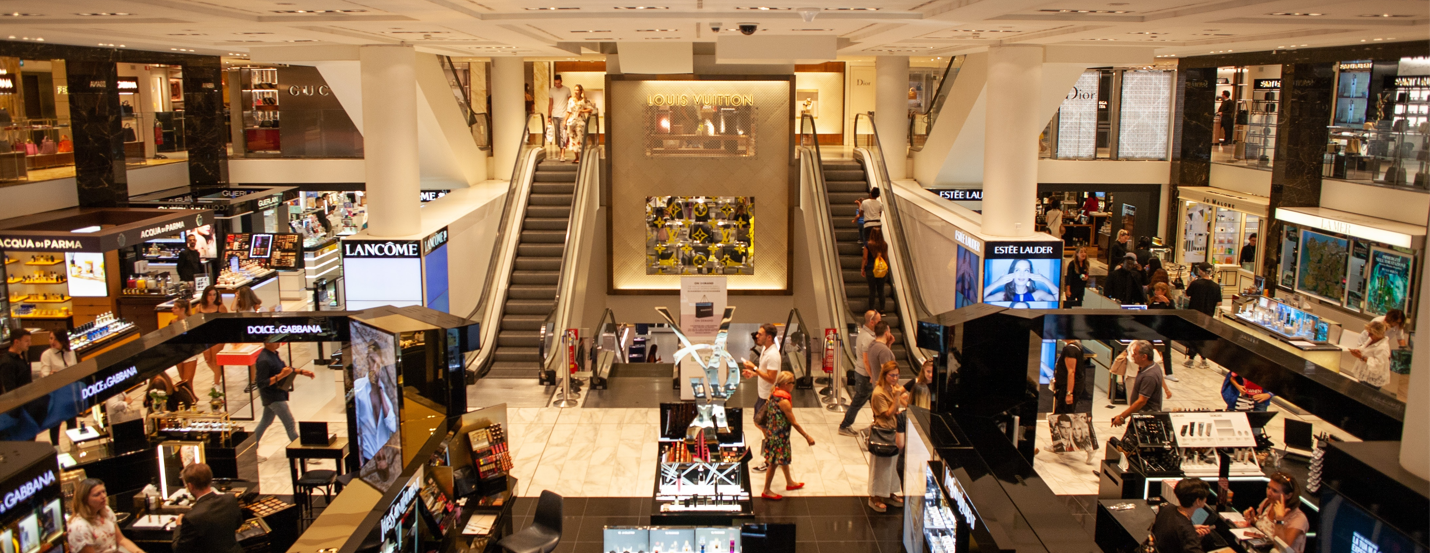

Customer segmentation has useful applications in the marketing industry. It provides the ability to understand customer behavior, consumption, spending data and many other parameters that can help business owners understand their personas.

In this notebook some clustering methods based on 2 datasets, Mall customers and Iris, will be presented. The main objective is to run some models like Kmeans, DBSCAN, Hierarquical methods and PCA and get some insights that each model can provide.

Unsupervised learning is a method of machine learning where there is no label in the learning algorithm. One type of unsupervised learning is clustering, the process of separating groups according to their similarities [1]. In the Marketing area, it can be used for customer segmentation, making it possible to outline business strategies. It also has many applications in the field of biology, such as classification of biological species.

##**1. KMeans**

K-Means is one of the most popular unsupervised learning algorithms in Machine Learning.

It separates the data into k clusters, based only on existing patterns. K-means is one of the simplest unsupervised learning algorithms that solves the well known clustering problem. Then each data point is and associated to the nearest centroid. When no point is pending, the first step is completed and an early groupage is done. A loop is done in order to re-calculate k new centroids until no more changes are required, ie, centroids do not move any more [2].<br>To achieve the K value, it is necessary to perform the Elbow method. This method runs k-means clustering on a given dataset for a range of values of k. The increase of the cluster number K will reduce the distance to data points, decreasing this metric, reaching zero when K is as same as the number of data points. 



The dataset is provided in Kaggle and contains the basic information (ID, age, gender, income, spending score) about the customers.<br>
The Spending Score is the score given the mall, based on the money spent and the customer behavior.

In [1]:
#importing main libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#creating DataFrames from csv files
df = pd.read_csv('/content/sample_data/Mall_Customers.csv')

**Exploratory data analysis**

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.nunique(axis=0)

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [218]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


There is no null values in the dataset, confirmed by isnull()

In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There is an almost equal distribution between men and women, and there is no significant difference between Gender in Annual Income.

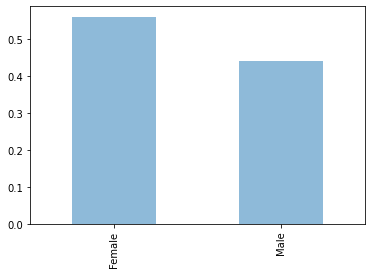

In [7]:
df['Gender'].value_counts(normalize=True).plot(kind = 'bar', alpha = 0.5)

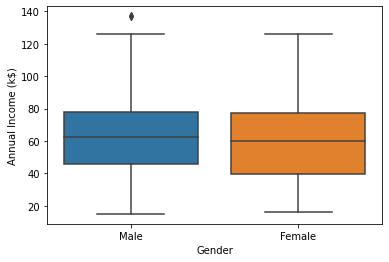

In [8]:
ax = sns.boxplot(x="Gender", y="Annual Income (k$)", data=df)

There is no correlation between variables as can be seen in pairplot and correlation matrix. The Age variable ti seems to be mostly between 30 and 40, as can be confirmed in DataFrame bellow.

In [9]:
age_information = pd.DataFrame(df.Age.describe())
age_information

,Age
count,200.000000
mean,38.850000
std,13.969007
min,18.000000
25%,28.750000
50%,36.000000
75%,49.000000
max,70.000000


Relating to Income variable, most values are around 60 to 80 thousand dollars.

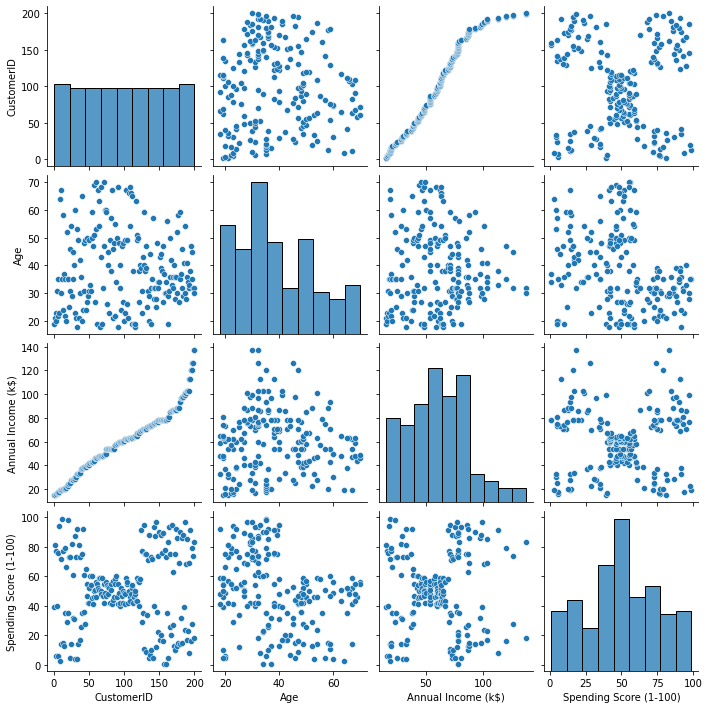

In [10]:
sns.pairplot(df)

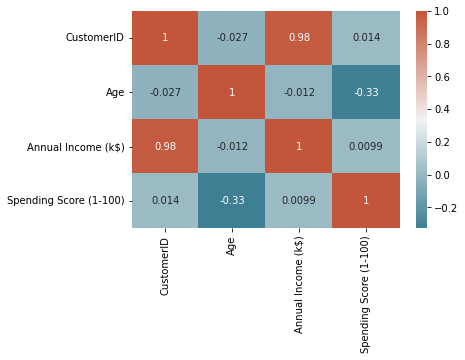

In [11]:
#correlation matrix
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

The women spending score is slighly greater than men.

In [12]:
spending_score = pd.DataFrame(df['Spending Score (1-100)'].groupby(df['Gender']).mean())
spending_score

,Spending Score (1-100)
Gender,
Female,51.526786
Male,48.511364


**Elbow method**

In [13]:
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [14]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_sc = sc.fit_transform(df.iloc[:,2:5])

In [15]:
#Firstly, transfoming X into a Dataframe from a numpy array and then concatenate with Gender column
X_sc = pd.DataFrame(X_sc, columns = df.iloc[:,2:5].columns)
X_sc

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


In [16]:
#get dummies for object to numeric conversion
df_gender = df['Gender']
df_gender = pd.get_dummies(df_gender, drop_first=True)
df_gender

,Male
0,1
1,1
2,0
3,0
4,0
...,...
195,0
196,0
197,1
198,1


In [17]:
df = pd.concat([X_sc, df_gender], axis=1)
df

,Age,Annual Income (k$),Spending Score (1-100),Male
0,-1.424569,-1.738999,-0.434801,1
1,-1.281035,-1.738999,1.195704,1
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,0
...,...,...,...,...
195,-0.276302,2.268791,1.118061,0
196,0.441365,2.497807,-0.861839,0
197,-0.491602,2.497807,0.923953,1
198,-0.491602,2.917671,-1.250054,1


In [18]:
from sklearn.cluster import KMeans

In [19]:
df.iloc[:, 1:3]

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


In [20]:
X = df.iloc[:, 1:3].values

In [21]:
# Using the elbow method to find the optimal number of clusters
clusters = []
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

#append model to cluster list
    clusters.append(kmeans)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


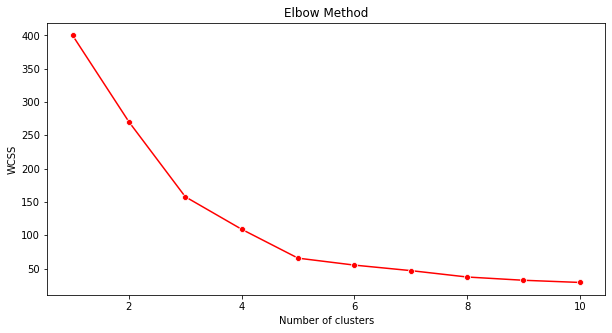

In [22]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
#Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

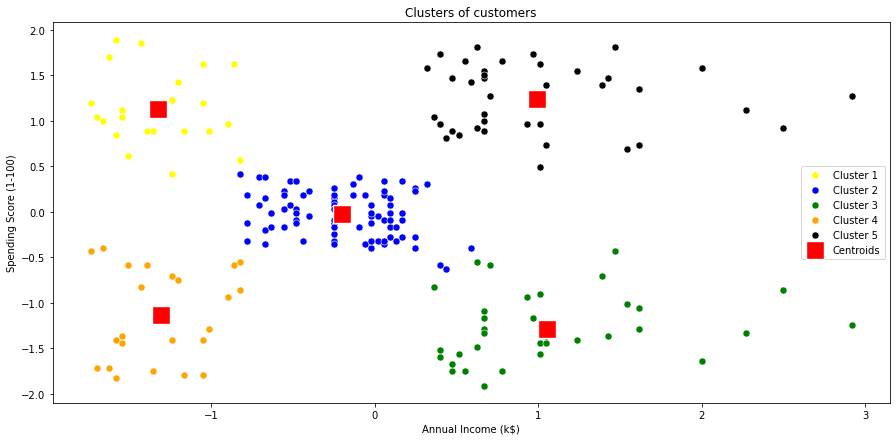

In [24]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color = 'orange', label = 'Cluster 4',s=50)
sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'black', label = 'Cluster 5',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [25]:
##Scale the data
from scipy.stats import zscore
mydata_z = df.iloc[:, 1:3].apply(zscore)

In [26]:
from sklearn.metrics import silhouette_score
for i in range(1,9,1):
    
    print("---------------------------------------")
    print(clusters[i])
    print("Silhouette score:",silhouette_score(mydata_z, clusters[i].predict(mydata_z)))

---------------------------------------
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)
Silhouette score: 0.3093014040985521
---------------------------------------
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)
Silhouette score: 0.46658474419000145
---------------------------------------
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)
Silhouette score: 0.49390692375131984
---------------------------------------
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       ran

In the graph, it can be seen that there are 5 major clusters, calculated based on Elbow method.<br>
The **Cluster 1** (yellow colored) is in the upper left of the graph, meaning a high spending score with a relatively low annual income. Inspite of their income, they still by products in the stores. Differently from **Cluster 4** (orange colored), that equally have low income, but in this case buy less. To the shopping mall, this classification explain a low consumption behavior due to salary and can do in this case, sales promotion or just tend to ignore this group. This cluster could be compared to **Cluster 2**, that have a higher income, and spends more than this group and less than cluster 1, even with more potential to buy.<br>
In cluster 2(blue colored) we can see that people have low income but higher spending scores, these are those people who for some reason love to buy products more often even though they have a low income. Maybe it’s because these people are more than satisfied with the mall services. The shops/malls might not target these people that effectively but still will not lose them.
In **cluster 3** (green colored) there are people with high income but low spending scores. More information are neessary to understand this behavior. It can be due to low interest in currente mall’s products and services. This group needs more attention to make them more interested.
The **cluster 5** (red-colored) are people with high income and high spending scores, sucess case of the mall and more attetion in remarketing and relation buildings are needed.

##**2. Density-Based Spatial Clustering of Applications with Noise (DBSCAN)**

DBSCAN is a clustering algorithm implemented in scikit-learn library [3]. 
In this model, it is assumed that natural clusters are composed of densely located points, grouping similar datapoints in the same space. The model can identify regions of high and low density, this last being considered outliers. Hence, unlike KMEANS it doesn´t requires the number of clusters previously to build the model. The hyperparameters are ε (eps),  the radius of the circle to be created around each data point to check the density, and the minimum number of points required to form a dense region (minPts). 

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
df = pd.read_csv('/content/sample_data/Mall_Customers.csv')

In [29]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_sc = sc.fit_transform(df.iloc[:, 2:5])

In [30]:
#Firstly, transfoming X into a Dataframe from a numpy array and then concatenate with Gender column
X_sc = pd.DataFrame(X_sc, columns = df.iloc[:,2:5].columns)
X_sc

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


In [31]:
#get dummies for object to numeric conversion
df_gender = df['Gender']
df_gender = pd.get_dummies(df_gender, drop_first=True)
df_gender

,Male
0,1
1,1
2,0
3,0
4,0
...,...
195,0
196,0
197,1
198,1


In [32]:
df = pd.concat([X_sc, df_gender], axis=1)
df

,Age,Annual Income (k$),Spending Score (1-100),Male
0,-1.424569,-1.738999,-0.434801,1
1,-1.281035,-1.738999,1.195704,1
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,0
...,...,...,...,...
195,-0.276302,2.268791,1.118061,0
196,0.441365,2.497807,-0.861839,0
197,-0.491602,2.497807,0.923953,1
198,-0.491602,2.917671,-1.250054,1


In [33]:
from sklearn.cluster import DBSCAN

In [34]:
X = df.iloc[:, 1:3].values

In [35]:
dbscan = DBSCAN(eps = 0.20, min_samples=5, metric='euclidean')

In [36]:
y_dbscan = dbscan.fit_predict(X)

The -1 value in the y_dbscan array is the noise.

In [37]:
np.unique(y_dbscan)

array([-1,  0,  1,  2,  3,  4,  5,  6])

The graphic bellow shows the noisy region marked with black points. The clustering profile is similar to KMEANS

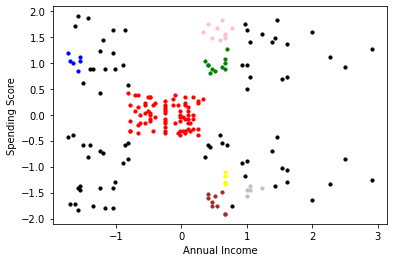

In [38]:
plt.scatter(X[y_dbscan == -1, 0], X[y_dbscan == -1, 1], s = 10, c = 'black')
plt.scatter(X[y_dbscan == 0, 0], X[y_dbscan == 0, 1], s = 10, c = 'blue')
plt.scatter(X[y_dbscan == 1, 0], X[y_dbscan == 1, 1], s = 10, c = 'red')
plt.scatter(X[y_dbscan == 2, 0], X[y_dbscan == 2, 1], s = 10, c = 'green')
plt.scatter(X[y_dbscan == 3, 0], X[y_dbscan == 3, 1], s = 10, c = 'brown')
plt.scatter(X[y_dbscan == 4, 0], X[y_dbscan == 4, 1], s = 10, c = 'pink')
plt.scatter(X[y_dbscan == 5, 0], X[y_dbscan == 5, 1], s = 10, c = 'yellow')      
plt.scatter(X[y_dbscan == 6, 0], X[y_dbscan == 6, 1], s = 10, c = 'silver')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

##**3. Hierarchical clustering**

Hierarchical clustering is also a unsupervised method and builds a hierarchy of clusters without based on a previously similarity score and it is visualized using a dendrogram [4]. Its representation relies on similarity. <br> The similarity score can be calculated using distance metrics such as Euclidean, Manhatan, Mahalanobis, etc.

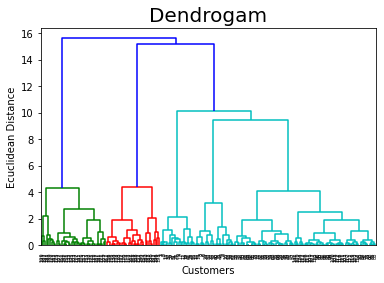

In [39]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

No handles with labels found to put in legend.


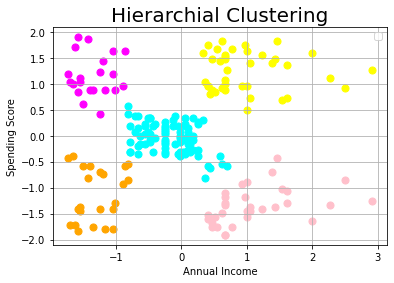

In [40]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'pink')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'yellow')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'cyan')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50, c = 'magenta')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 50, c = 'orange')


plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

**Iris Dataset**

To finish this notebook, it will be build a model based on Principal Component analysis using Iris Dataset. 

#**4. Principal Component Analysis (PCA)**

PCA is an algorithm that reduces dataset dimensions based on eigenvectors of its variance. All dimensions are orthogonal (linearly independent) [5]. 

In [41]:
df = pd.read_csv('/content/sample_data/Iris.csv')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [43]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


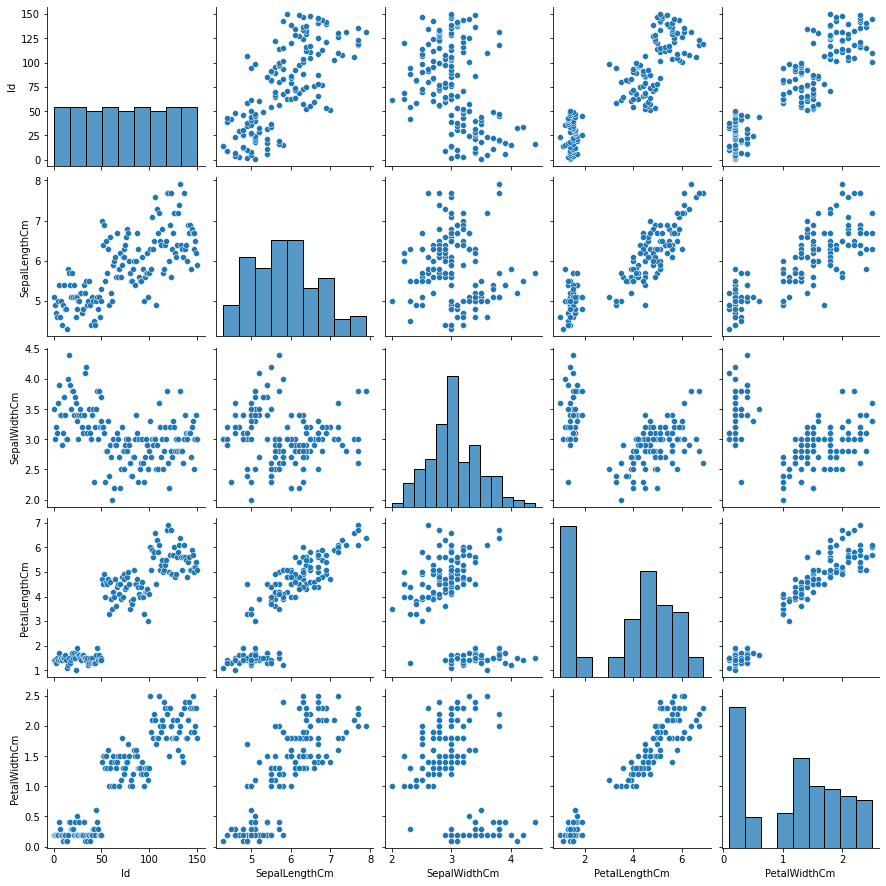

In [44]:
sns.pairplot(df)

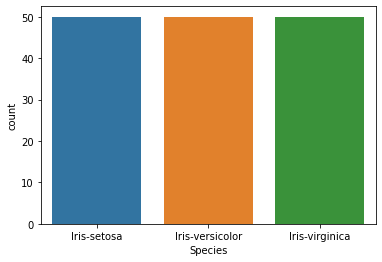

In [45]:
sns.countplot(x="Species", data=df)

In [46]:
X = df.iloc[:,1:5].values
y = df['Species']

In [47]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y=LabelEncoder()
y=labelencoder_y.fit_transform(y)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=20, stratify=y)

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [50]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(X)
df_PCA = pd.DataFrame(X, columns=['PC1','PC2'])
df_PCA.head(3)

,PC1,PC2
0,-2.684207,0.326607
1,-2.715391,-0.169557
2,-2.889820,-0.137346


In [51]:
pca.get_covariance()

array([[ 0.67919741, -0.03258618,  1.27066452,  0.5321852 ],
       [-0.03258618,  0.18113034, -0.31863564, -0.13363564],
       [ 1.27066452, -0.31863564,  3.11934547,  1.28541527],
       [ 0.5321852 , -0.13363564,  1.28541527,  0.58961806]])

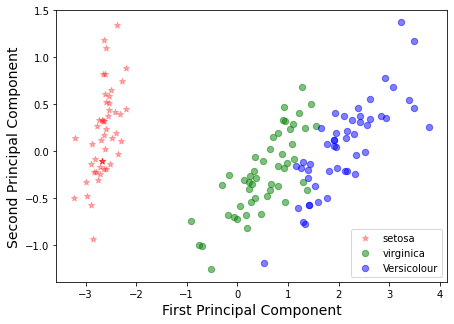

In [52]:
Xax=X[:,0]
Yax=X[:,1]
labels=y
cdict={0:'red',1:'green', 2:'blue'}
labl={0:'setosa',1:'virginica', 2:'Versicolour'}
marker={0:'*',1:'o',2:'o'}
alpha={0:.3, 1:.5,2:.5}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(labels):
 ix=np.where(labels==l)
 ax.scatter(Xax[ix],Yax[ix],c=cdict[l],s=40,
           label=labl[l],marker=marker[l],alpha=alpha[l])
# for loop ends
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()

In [53]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.92461621, 0.05301557])

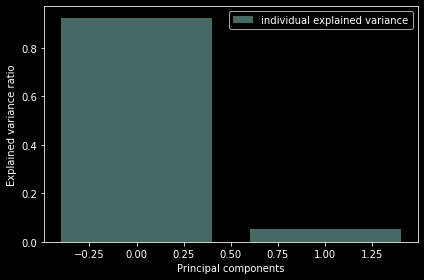

In [54]:
with plt.style.context('dark_background'):
  plt.figure(figsize=(6, 4))

  plt.bar(range(2), explained_variance, alpha=0.5, align='center',
          label='individual explained variance')
  plt.ylabel('Explained variance ratio')
  plt.xlabel('Principal components')
  plt.legend(loc='best')
  plt.tight_layout()

##**5. Conclusion**

In this work it was possible to apply some clustering methods to a marketing dataset, that shed some light into customers behavior. Through K-Means, DBSCAN and hierarchical clustering, the groups were separated according to their income and spending score. <br> It was also possible to perform dimensionality reduction to Iris dataset and classify the species. <br> The purpose of this work was to apply these unsupervised learning algorithms and explore each method individualities.

##**6. References**

* [1] Introduction to Machine Learning with Python; Muller, AC, Guido, S.; 2017
* [2] https://towardsdatascience.com/unsupervised-learning-and-data-clustering-eeecb78b422a
* [3] Ester, Martin ; Kriegel, Hans-Peter ; Sander, Jörg ; Xu, Xiaowei: A Density-Based Algorithm for Discovering Clusters in Large Spatial Databases with Noise. In: Proc. of 2nd International Conference on Knowledge Discovery and, 1996, S. 226-231
* [4] [https://pub.towardsai.net/everything-on-hierarchical-clustering-60bf613377a2]
* [5] https://www.kaggle.com/kashnitsky/topic-7-unsupervised-learning-pca-and-clustering
<br>
<br>I am thankfull to Tuur Tisseghem from Pexels photo